## Observations and Insights 

10 Treatments totals, out of which highest number of study is treated by Capomulin, followed closely by Ramicane and lowest is Propiva. 

The number of male and female mice are almost the same treated. 

The scatter plot suggests that the avg tumor volm was directly proportional to the weight of the mice regardless of its gender. 

There was only one outlier in Infubinol Dose regimen, nonetheless, Campomulin and Ramicane results were close to reduce the size of the overall tumor volume in mice. 



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [2]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [3]:
# Combine the data into a single dataset
# ssc_comb_df = pd.merge(mouse_metadata,study_results, how= 'left', on= 'Mouse ID')
ssc_comb_df = mouse_metadata.merge(study_results, on = "Mouse ID")
ssc_comb_df.head()
# ssc_comb_df.count()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Display the data table for preview
ssc_comb_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
num_mice= ssc_comb_df["Mouse ID"].nunique() #the nunique feature gives all number of unique points
# len(num_mice)
num_mice

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# ssc_comb_duplicate = ssc_comb_df.loc[ssc_comb_df.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
# df_dup = pd.DataFrame({"Mouse ID" : ssc_comb_duplicate})
# df_dup
ssc_comb_duplicate = ssc_comb_df.duplicated(subset = ["Mouse ID", "Timepoint"], keep= False)
dup_mice_list = ssc_comb_df.loc[ssc_comb_duplicate, "Mouse ID"].unique()
dup_mice_list

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = ssc_comb_df.loc[ssc_comb_df["Mouse ID"] == dup_mice_list[0], :]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#trying to use drop_duplicate function instead of isin function - isin function works well as well. 

# clean_ssc_df = ssc_comb_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"], keep = 'first', inplace = False)
# clean_ssc_df1 = ssc_comb_df[ssc_comb_df["Mouse ID"].isin(ssc_comb_duplicate)==False]
# clean_ssc_df1

clean_ssc_df = ssc_comb_df.drop(duplicate_mice_df.index)
check_dup_rows = clean_ssc_df.loc[clean_ssc_df["Mouse ID"] == dup_mice_list[0], :]
check_dup_rows #all duplicate rows are dropped

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [9]:
clean_ssc_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
clean_ssc_df.describe() #13 rows in DF duplicate_mice_df are dropped as they are duplicated

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [11]:
# Checking the number of mice in the clean DataFrame.
#using Drop function
num_mice_n1 = clean_ssc_df["Mouse ID"].nunique()
num_mice_n1

248

## Summary Statistics

Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [12]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_drug_grp = clean_ssc_df.groupby("Drug Regimen")
# regimen_drug_grp.head()

In [13]:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = regimen_drug_grp["Tumor Volume (mm3)"].mean()
df_1 = pd.DataFrame({"Mean" : mean})
median = regimen_drug_grp["Tumor Volume (mm3)"].median()
df_1["Median"] = median
variance = regimen_drug_grp["Tumor Volume (mm3)"].var()
df_1["Variance"] = variance
stddev = regimen_drug_grp["Tumor Volume (mm3)"].std()
df_1["Standard Deviation"] = stddev
stderrmean = regimen_drug_grp["Tumor Volume (mm3)"].sem() #standard error of mean
df_1["SEM"] = stderrmean
df_1


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Using the aggregation method, produce the same summary statistics in a single line

df_2 = regimen_drug_grp["Tumor Volume (mm3)"].agg(['mean','median', 'var', 'std', 'sem'])
df_2_dataf = df_2.rename(columns = {
    'mean':'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard deviation',
    'sem': 'SEM'
    
})
df_2_dataf 

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

num_timepoints_mice = regimen_drug_grp['Timepoint'].count().sort_values(ascending = False)
num_timepoints_mice

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Timepoint, dtype: int64

# Bar Plot using Pyplot

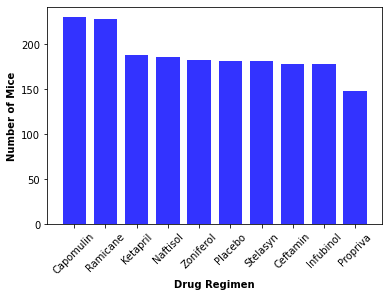

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_ntimepoint = np.arange(len(num_timepoints_mice))
x_name = list(num_timepoints_mice.index.values)

# create Bar chart
py_pd_data3 = plt.bar(x_ntimepoint,num_timepoints_mice, color='blue', alpha = 0.8, width = 0.75)
plt.xticks(x_ntimepoint, x_name, rotation = 45)
plt.xlabel('Drug Regimen', fontweight = 'bold')
plt.ylabel('Number of Mice', fontweight = 'bold')
plt.show()

# Bar Plot Using Pandas

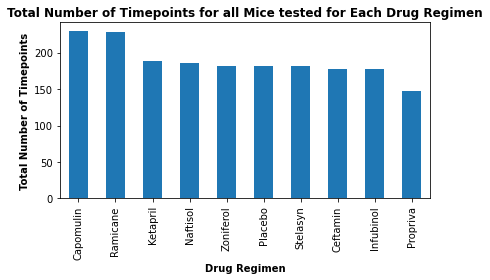

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pandas.
pd_data3 = num_timepoints_mice.plot(kind = 'bar', width = 0.5)
#set X & Y labels
pd_data3.set_title(label='Total Number of Timepoints for all Mice tested for Each Drug Regimen', fontweight = 'bold')
pd_data3.set_xlabel('Drug Regimen', fontweight = 'bold')
pd_data3.set_ylabel('Total Number of Timepoints', fontweight = 'bold')
plt.tight_layout()
plt.show()

## Pie chart using Pandas

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_sex_dist = clean_ssc_df.groupby("Sex").count()
mice_sex_dist

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


In [19]:
mice_sex_dist1 = clean_ssc_df.groupby("Sex")["Sex"].count()
mice_sex_dist1

Sex
Female    922
Male      958
Name: Sex, dtype: int64

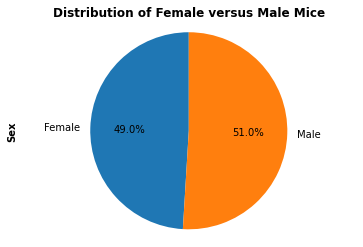

In [20]:
pie_mice_sex_dist = mice_sex_dist1.plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.axis("equal")
pie_mice_sex_dist.set_title(label = "Distribution of Female versus Male Mice", fontweight = "bold")
pie_mice_sex_dist.set_ylabel('Sex', fontweight = 'bold')
explode = (0,0.05)
plt.show()

### Pie Chart using Pyplot

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_dis = mice_sex_dist1.index
sex_dis

Index(['Female', 'Male'], dtype='object', name='Sex')

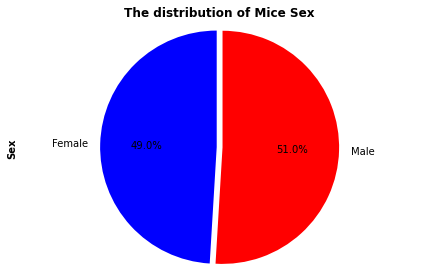

In [22]:
colors = ["blue", "red"]

#Pie chart
py_sex_dis = plt.pie(mice_sex_dist1,explode = explode, labels=sex_dis, autopct="%1.1f%%", colors=colors, startangle=90)
plt.axis("equal")
plt.title('The distribution of Mice Sex', fontweight = 'bold')
plt.ylabel('Sex', fontweight = 'bold')
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

f_tumor_volm = clean_ssc_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
f_tumor_volm_df = f_tumor_volm.reset_index()
f_tumor_volm_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
243,Zoniferol,q633,45,70.827796
244,Zoniferol,s337,45,62.109651
245,Zoniferol,w140,5,47.717952
246,Zoniferol,w575,45,68.401286


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
drug_reg = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

In [25]:
 # Calculate the IQR and quantitatively determine if there are any potential outliers.

for drug in drug_reg: 
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    f_tumor_volm1 = f_tumor_volm_df.loc[f_tumor_volm_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset to tumor_vol_data
    tumor_vol_data.append(f_tumor_volm1)
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    
    quartiles = f_tumor_volm1.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = f_tumor_volm1.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = f_tumor_volm1.loc[(f_tumor_volm1 < lower_bound) 
                                   | (f_tumor_volm1 > upper_bound)]
    
     # Print out the result
    print(f"{drug} Regimen")
    print(f"Final tumor volume(mm3) for {drug} below {round(lower_bound,2)} could be outliers.")
    print(f"Final tumor volume(mm3) for {drug} above {round(upper_bound,2)} could be outliers.")
    print(f"Average tumor volume(mm3) for {drug} is: {round(mean,2)}")
    print(f"Number of outliers for {drug} is: {outliers.count()}")
    if outliers.count() > 0:
        for i in outliers.index:
            print(f'Outlier final tumor volume(mm3) is {round(outliers[i], 2)}')
    print('----------------------------------------------------------')
   

Capomulin Regimen
Final tumor volume(mm3) for Capomulin below 20.7 could be outliers.
Final tumor volume(mm3) for Capomulin above 51.83 could be outliers.
Average tumor volume(mm3) for Capomulin is: 36.67
Number of outliers for Capomulin is: 0
----------------------------------------------------------
Ramicane Regimen
Final tumor volume(mm3) for Ramicane below 17.91 could be outliers.
Final tumor volume(mm3) for Ramicane above 54.31 could be outliers.
Average tumor volume(mm3) for Ramicane is: 36.19
Number of outliers for Ramicane is: 0
----------------------------------------------------------
Infubinol Regimen
Final tumor volume(mm3) for Infubinol below 36.83 could be outliers.
Final tumor volume(mm3) for Infubinol above 82.74 could be outliers.
Average tumor volume(mm3) for Infubinol is: 58.18
Number of outliers for Infubinol is: 1
Outlier final tumor volume(mm3) is 36.32
----------------------------------------------------------
Ceftamin Regimen
Final tumor volume(mm3) for Ceftamin

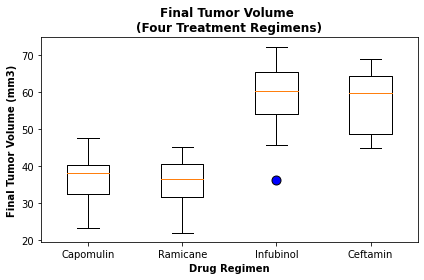

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest 
fig1, tumor_plot = plt.subplots()
tumor_plot.boxplot(tumor_vol_data, labels=drug_reg, flierprops={'markerfacecolor':'b','markersize': 9})

tumor_plot.set_title('Final Tumor Volume \n(Four Treatment Regimens)', fontweight='bold')
tumor_plot.set_xlabel('Drug Regimen', fontweight='bold')
tumor_plot.set_ylabel('Final Tumor Volume (mm3)', fontweight='bold') 
plt.tight_layout()
plt.show()

## Line and Scatter Plots

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = clean_ssc_df.loc[clean_ssc_df['Drug Regimen'] == 'Capomulin']
Capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [28]:
# Identify specific mouse ID and get data of the mouse id
mouse_id = 's185'
mouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == mouse_id]
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


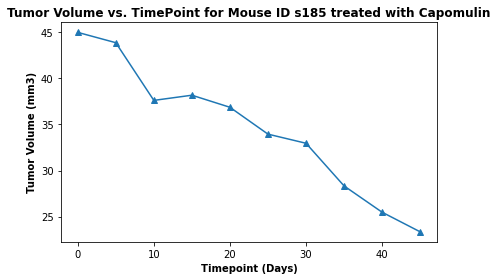

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tum_vol_s185 = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='^')

# Set x/y label, title
plt.title(f"Tumor Volume vs. TimePoint for Mouse ID {mouse_id} treated with Capomulin", fontweight='bold')
plt.xlabel('Timepoint (Days)', fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', fontweight='bold')
plt.tight_layout()

plt.show()

### Scatter plot of avg tumor volm vs mouse weight for Capomulin regimen

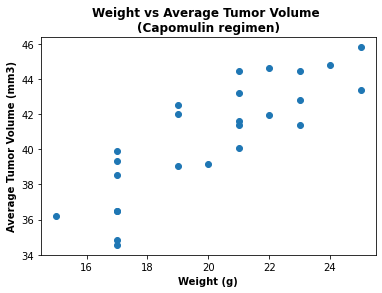

In [30]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_grp = Capomulin_df.groupby('Mouse ID').mean()
mice_weight_avg = Capomulin_grp['Weight (g)']
mice_tumor_avg = Capomulin_grp['Tumor Volume (mm3)']
# Generate a scatter plot
plt.scatter(mice_weight_avg, mice_tumor_avg)

# Set x/y label, title
plt.title('Weight vs Average Tumor Volume \n(Capomulin regimen)', fontweight='bold')
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')

# Present the box plot chart
plt.show()


## Correlation and Regression

The correlation between mouse weight and tumor vol is 0.84
The r-squared is: 0.71


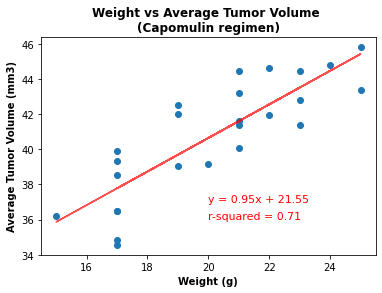

In [31]:
# Calculate the correlation coefficient and linear regression model 

# Define x,y values
x_values = mice_weight_avg
y_values = mice_tumor_avg

# Calculate the correlation
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation between mouse weight and tumor vol is {correlation}")

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Calculate r-squared
r_squared = round(rvalue**2,2)
print(f"The r-squared is: {r_squared}")

# for mouse weight and average tumor volume for the Capomulin regimen

# y = mx + b
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(line_eq,(20,37), fontsize=11, color="red")
plt.annotate(f'r-squared = {r_squared}', (20,36), fontsize=11, color="red")

# Define title and x/y labels
plt.title('Weight vs Average Tumor Volume \n(Capomulin regimen)', fontweight='bold')
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')

plt.show()
